# **TUGAS MACHINE LEARNING**

### Nama      : Nurainiyah Solehan
### NIM       : 09011282227092
### Kelas     : SK6B

In [34]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [35]:
# Load dataset
df = pd.read_csv('Covid19.csv')

Dataset yang digunakan berasal dari laporan harian fasilitas rumah sakit di berbagai negara bagian di Malaysia selama masa pandemi COVID-19. Data ini dikumpulkan oleh Kementerian Kesehatan Malaysia (Kementerian Kesihatan Malaysia - KKM) atau lembaga resmi pemerintah yang bertugas mengelola informasi terkait COVID-19.

# **Exploratory Data Analysis (EDA)**



In [36]:
# Melihat 5 data teratas
df.head()

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2,2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8


Penjelasan kolom:

date : Tanggal pencatatan data harian selama masa pandemi COVID-19.

state : Nama negara bagian di Malaysia tempat data dikumpulkan.

beds : Jumlah total tempat tidur rumah sakit yang tersedia.

beds_covid : Jumlah tempat tidur yang dikhususkan untuk pasien COVID-19.

beds_noncrit : Jumlah tempat tidur non-kritis yang tersedia di rumah sakit.

admitted_pui : Jumlah pasien dalam pemantauan (PUI) yang dirawat pada hari tersebut.

admitted_covid : Jumlah pasien terkonfirmasi COVID-19 yang dirawat pada hari tersebut.

admitted_total : Total pasien yang dirawat, termasuk PUI, COVID-19, dan lainnya.

discharged_pui : Jumlah pasien PUI yang telah dipulangkan dari rumah sakit.

discharged_covid : Jumlah pasien COVID-19 yang telah dipulangkan.

discharged_total : Total pasien yang dipulangkan dari rumah sakit pada hari tersebut.

hosp_covid : Jumlah pasien COVID-19 yang masih dirawat di rumah sakit.

hosp_pui : Jumlah pasien PUI yang masih menjalani perawatan di rumah sakit.

hosp_noncovid : Jumlah pasien non-COVID yang masih dirawat inap.



In [37]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19491 entries, 0 to 19490
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              19491 non-null  object
 1   state             19491 non-null  object
 2   beds              19491 non-null  int64 
 3   beds_covid        19491 non-null  int64 
 4   beds_noncrit      19491 non-null  int64 
 5   admitted_pui      19491 non-null  int64 
 6   admitted_covid    19491 non-null  int64 
 7   admitted_total    19491 non-null  int64 
 8   discharged_pui    19491 non-null  int64 
 9   discharged_covid  19491 non-null  int64 
 10  discharged_total  19491 non-null  int64 
 11  hosp_covid        19491 non-null  int64 
 12  hosp_pui          19491 non-null  int64 
 13  hosp_noncovid     19491 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 2.1+ MB


Berdasarkan hasil eksplorasi awal terhadap dataset yang digunakan, diperoleh informasi bahwa data tersebut terdiri atas 19.491 baris dan 14 atribut (kolom). Dari keseluruhan atribut tersebut, terdapat dua atribut bertipe data kategorikal (objek), yaitu tanggal (date) dan nama negara bagian (state), sementara dua belas atribut lainnya bertipe numerik (integer).

In [38]:
# Mengecek nilai yang hilang
df.isna().sum()

date                0
state               0
beds                0
beds_covid          0
beds_noncrit        0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
hosp_covid          0
hosp_pui            0
hosp_noncovid       0
dtype: int64

Hasil pengecekan menunjukkan bahwa seluruh kolom dalam dataset tidak mengandung nilai yang hilang (missing values).

In [39]:
# Melihat deskripsi data
df.describe(include='all')

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
count,19491,19491,19491.000000,19491.000000,19491.000000,19491.000000,19491.000000,19491.000000,19491.000000,19491.000000,19491.000000,19491.000000,19491.000000,19491.000000
unique,1244,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-12-06,Johor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,1244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2319.794931,479.452517,2232.969627,15.802781,30.965574,46.768355,12.221487,26.309579,38.531066,163.244369,35.426761,1321.071623
std,NaN,NaN,1504.035498,498.045889,1455.745113,33.490285,61.536746,85.366633,24.693953,54.188479,71.198740,318.111532,71.365056,933.629085
min,NaN,NaN,122.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1231.000000,124.000000,1205.000000,0.000000,1.000000,3.000000,0.000000,1.000000,3.000000,9.000000,1.000000,661.000000
50%,NaN,NaN,2057.000000,340.000000,1948.000000,3.000000,8.000000,14.000000,2.000000,7.000000,13.000000,44.000000,6.000000,1111.000000
75%,NaN,NaN,3277.000000,659.000000,3175.000000,13.000000,31.000000,48.000000,10.000000,26.000000,41.000000,184.000000,34.000000,1871.000000


Distribusi data:

beds : Jumlah total tempat tidur rumah sakit yang tersedia per entri, dengan nilai berkisar antara 122 hingga 6.568 tempat tidur, rata-rata sebesar 2.319 tempat tidur.

beds_covid : Jumlah tempat tidur yang dikhususkan untuk pasien COVID-19, dengan nilai maksimum 4.713 dan rata-rata 479 tempat tidur.

beds_noncrit : Tempat tidur non-kritis di rumah sakit, dengan rata-rata sekitar 2.233 dan maksimum hingga 6.224 tempat tidur.

admitted_pui : Jumlah pasien dalam pemantauan (PUI) yang dirawat, dengan nilai rata-rata 15 dan maksimum 451 pasien.

admitted_covid : Jumlah pasien COVID-19 yang dirawat per hari, rata-rata sebanyak 31 pasien, maksimum hingga 789 pasien.

admitted_total : Total pasien yang dirawat (PUI + COVID-19 + lainnya), dengan rata-rata 47 pasien dan maksimum 914 pasien.

discharged_pui : Pasien PUI yang dipulangkan, rata-rata 12 pasien per hari dengan nilai maksimum 236 pasien.

discharged_covid : Pasien COVID-19 yang dipulangkan, dengan nilai maksimum 658 dan rata-rata 26 pasien.

discharged_total : Total pasien yang dipulangkan, dengan rata-rata 39 pasien dan maksimum 732 pasien.

hosp_covid : Jumlah pasien COVID-19 yang sedang dirawat, dengan rata-rata 163 pasien dan nilai maksimum 4.218 pasien.

hosp_pui : Pasien PUI yang masih dirawat, dengan rata-rata 35 pasien dan nilai maksimum 874 pasien.

hosp_noncovid : Pasien non-COVID yang dirawat, dengan rata-rata 1.321 pasien dan maksimum mencapai 13.131 pasien.



In [40]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

Dari hasil pengecekan data didapatkan bahwa tidak ada nilai yang duplikat.

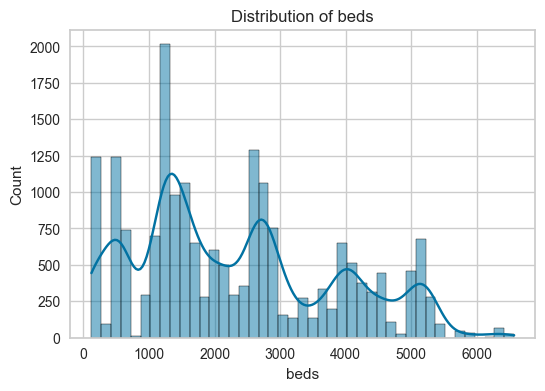

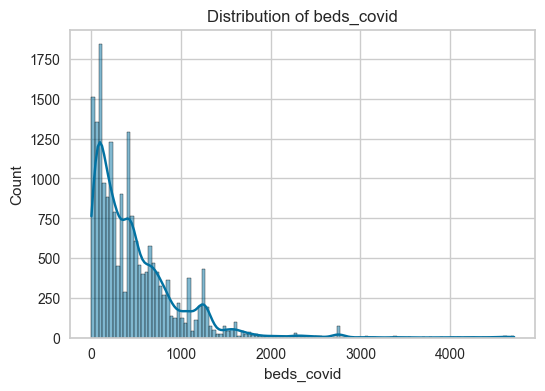

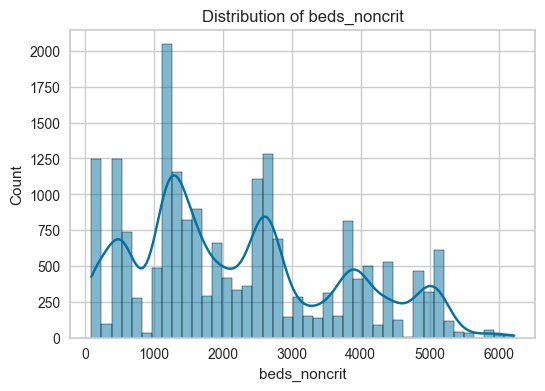

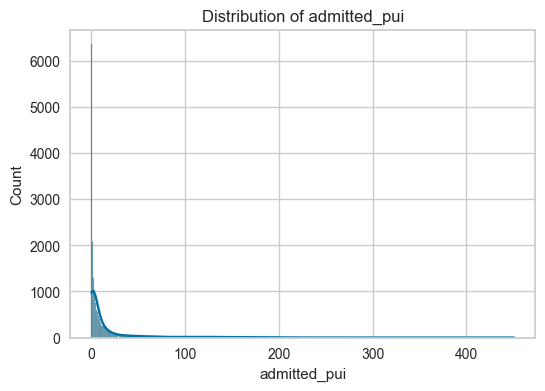

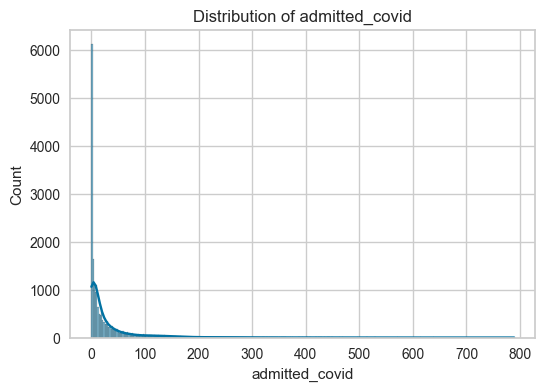

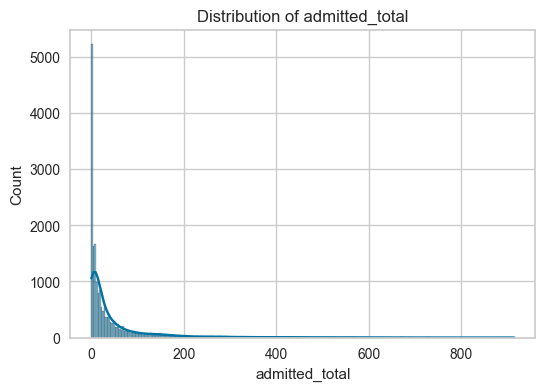

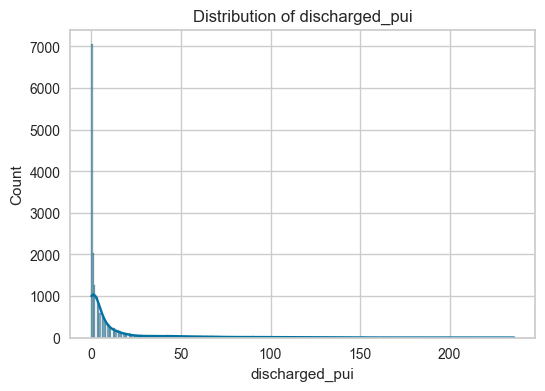

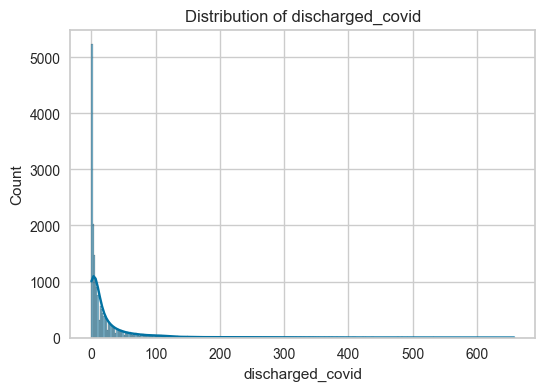

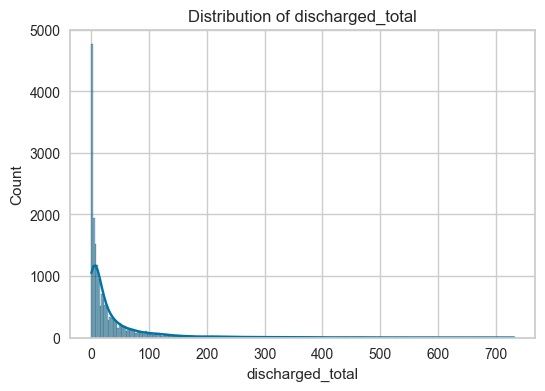

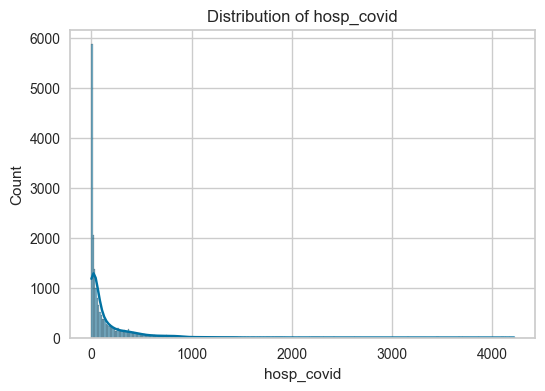

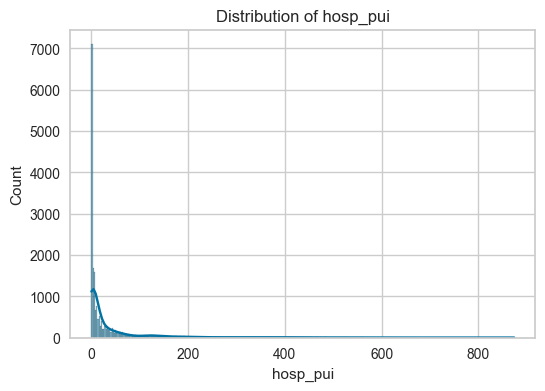

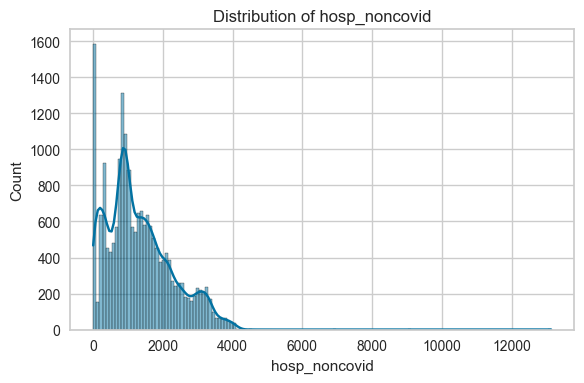

In [41]:
# Mengecek distribusi data
kolom_numerik = df.select_dtypes(include=['number']).columns
for kolom in kolom_numerik:
        plt.figure(figsize=(6,4))
        sns.histplot(df[kolom], kde=True)
        plt.title(f'Distribution of {kolom}')
plt.tight_layout()
plt.show()

Kode tersebut berfungsi untuk menampilkan distribusi frekuensi data numerik dalam bentuk histogram, sehingga pola sebaran data dapat terlihat

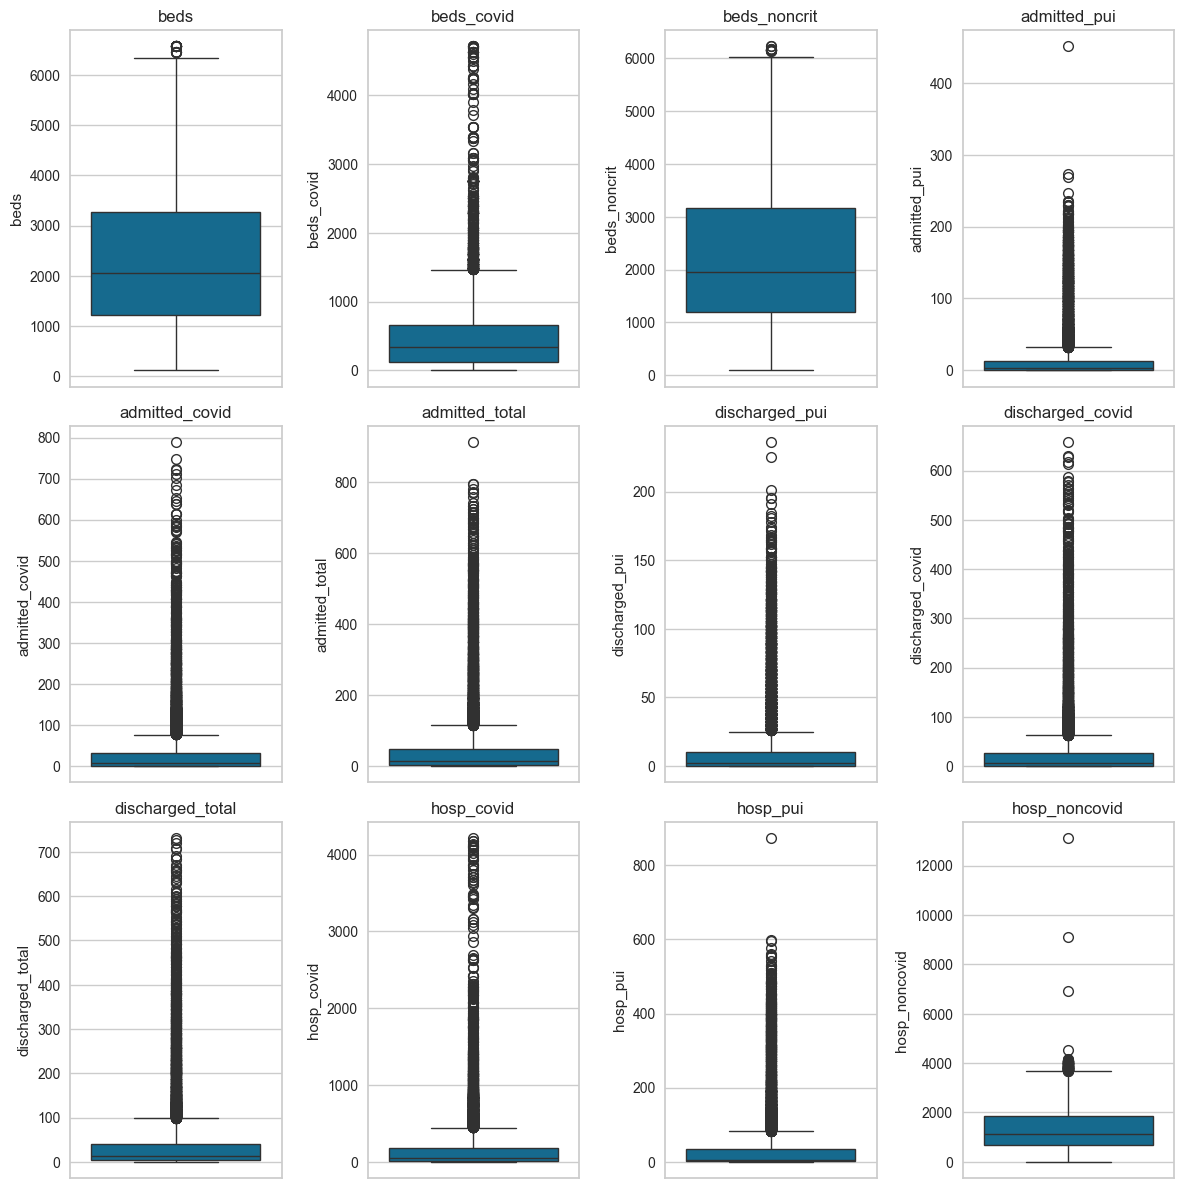

In [42]:
# Mengecek outlier
num_rows = 4
num_cols = 4
plt.figure(figsize=(12, 16))
kolom_numerik = df.select_dtypes(include=['number']).columns
for i, kolom in enumerate(kolom_numerik):
    if i < num_rows * num_cols:
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(y=df[kolom])
        plt.title(kolom)
plt.tight_layout()
plt.show()

Berdasarkan hasil boxplot diatas, didapatkan bahwa hampir seluruh kolom numerik dalam dataset mengandung nilai outlier. Outlier ini berpotensi memengaruhi hasil analisis secara keseluruhan, sehingga perlu dilakukan penanganan lebih lanjut guna memastikan kualitas dan keakuratan data tetap terjaga.

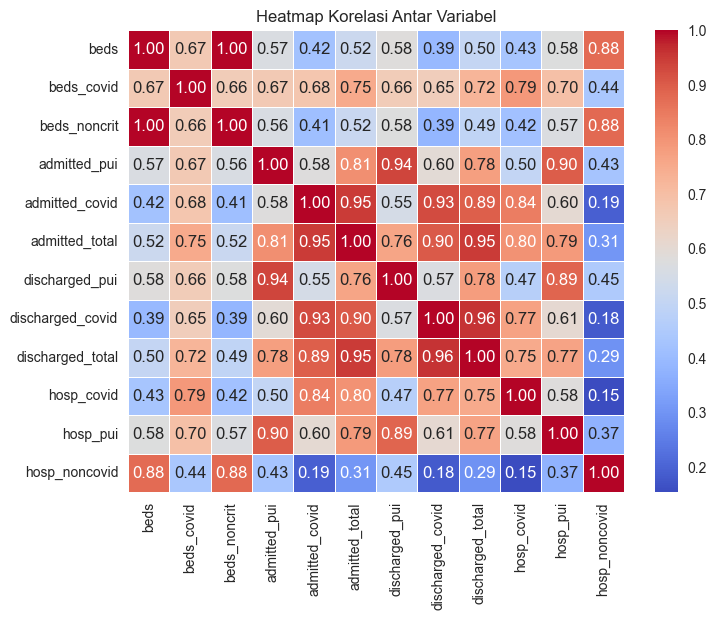

In [43]:
# Matriks korelasi
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Kode diatas digunakan untuk mengecek korelasi antar kolom numerik menggunakan heatmap. Heatmap menunjukkan korelasi tertinggi antara admitted_covid dan admitted_total (0.95), serta antara pasien yang dirawat dan dipulangkan untuk kategori PUI dan COVID-19 (di atas 0.9), menandakan hubungan yang sangat kuat. Sebaliknya, korelasi terendah antara hosp_noncovid dengan admitted_covid (0.19) dan discharged_covid (0.18), menunjukkan hubungan yang lemah antar rawat inap non-COVID dan pasien COVID-19.

# **Data Preprocessing**

In [44]:
# Menghilangkan outlier dengan quantil
lower_limit = df['beds_covid'].quantile(0.05)
upper_limit = df['beds_covid'].quantile(0.95)
df = df[(df['beds_covid'] > lower_limit) & (df['beds_covid'] < upper_limit)]

lower_limit = df['admitted_pui'].quantile(0.05)
upper_limit = df['admitted_pui'].quantile(0.95)
df = df[(df['admitted_pui'] > lower_limit) & (df['admitted_pui'] < upper_limit)]

lower_limit = df['admitted_covid'].quantile(0.05)
upper_limit = df['admitted_covid'].quantile(0.95)
df = df[(df['admitted_covid'] > lower_limit) & (df['admitted_covid'] < upper_limit)]

lower_limit = df['admitted_total'].quantile(0.05)
upper_limit = df['admitted_total'].quantile(0.95)
df = df[(df['admitted_total'] > lower_limit) & (df['admitted_total'] < upper_limit)]

lower_limit = df['discharged_pui'].quantile(0.05)
upper_limit = df['discharged_pui'].quantile(0.95)
df = df[(df['discharged_pui'] > lower_limit) & (df['discharged_pui'] < upper_limit)]

lower_limit = df['discharged_covid'].quantile(0.05)
upper_limit = df['discharged_covid'].quantile(0.95)
df = df[(df['discharged_covid'] > lower_limit) & (df['discharged_covid'] < upper_limit)]

lower_limit = df['discharged_total'].quantile(0.05)
upper_limit = df['discharged_total'].quantile(0.95)
df = df[(df['discharged_total'] > lower_limit) & (df['discharged_total'] < upper_limit)]

lower_limit = df['hosp_noncovid'].quantile(0.05)
upper_limit = df['hosp_noncovid'].quantile(0.95)
df = df[(df['hosp_noncovid'] > lower_limit) & (df['hosp_noncovid'] < upper_limit)]

lower_limit = df['hosp_pui'].quantile(0.05)
upper_limit = df['hosp_pui'].quantile(0.95)
df = df[(df['hosp_pui'] > lower_limit) & (df['hosp_pui'] < upper_limit)]

lower_limit = df['hosp_covid'].quantile(0.05)
upper_limit = df['hosp_covid'].quantile(0.95)
df = df[(df['hosp_covid'] > lower_limit) & (df['hosp_covid'] < upper_limit)]

Kode di atas digunakan untuk menangani outlier dalam dataset dengan menggunakan metode kuantil. Metode ini memfilter data dengan hanya mempertahankan nilai-nilai yang berada di antara persentil ke-5 (batas bawah) dan persentil ke-95 (batas atas) untuk setiap kolom. Dengan cara ini, nilai-nilai ekstrim di luar rentang tersebut dianggap sebagai outlier dan dihapus dari dataset.

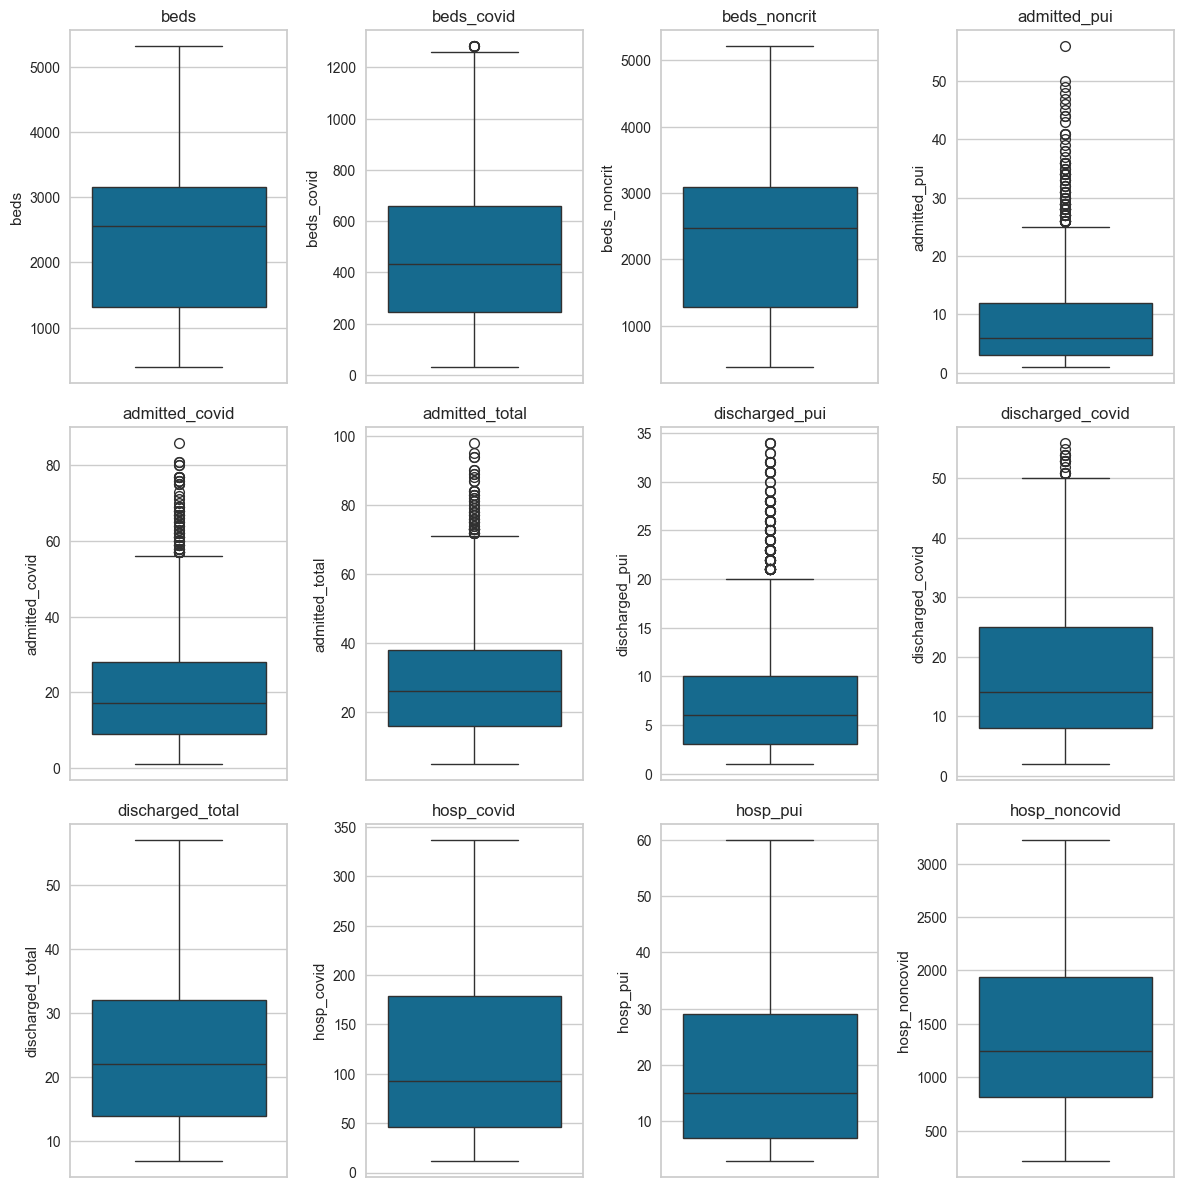

In [45]:
# Mengecek kembali outlier setelah dihilangkan
num_rows = 4
num_cols = 4
plt.figure(figsize=(12, 16))
kolom_numerik = df.select_dtypes(include=['number']).columns
for i, kolom in enumerate(kolom_numerik):
    if i < num_rows * num_cols:
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(y=df[kolom])
        plt.title(kolom)
plt.tight_layout()
plt.show()

Setelah dilakukan pengecekan ulang, sebagian besar outlier berhasil dihilangkan. Namun, pada beberapa kolom, masih terdapat sedikit nilai outlier.

In [46]:
# Copy dataset
df0 = df.copy()
# Menghapus kolom date
df0.drop(columns=["date"], inplace=True)

Kode ini untuk membuat salinan dari dataset asli dan kemudian menghapus kolom "date" dari salinan tersebut.

In [47]:
df0

,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
43,W.P. Kuala Lumpur,1570,248,1537,4,12,16,9,10,19,136,21,698
46,Kedah,1218,165,1183,1,4,5,1,6,7,50,6,584
49,Negeri Sembilan,1223,262,1205,2,6,8,14,11,25,103,4,515
58,W.P. Kuala Lumpur,1570,248,1537,6,16,22,10,12,22,152,20,675
65,Pahang,1520,180,1473,10,8,18,9,13,22,50,43,644
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,Selangor,4954,437,4808,26,5,31,28,2,30,19,27,2464
18718,Selangor,4954,437,4808,31,3,34,16,6,22,13,40,2341
18734,Selangor,4954,437,4808,25,6,31,30,4,34,15,35,3174
18846,Selangor,4954,437,4808,8,16,24,8,2,10,23,4,2854


In [48]:
# Mengambil kolom beds_covid dan hosp_covid
df1 = df0.iloc[:, [2, 10]].values

Kode ini digunakan untuk mengambil kolom beds_covid dan hosp_covid yang akan digunakan untuk pemodelan clustering

# **Pembangunan Model Clustering**

## *Kmeans k yang dipilih random*

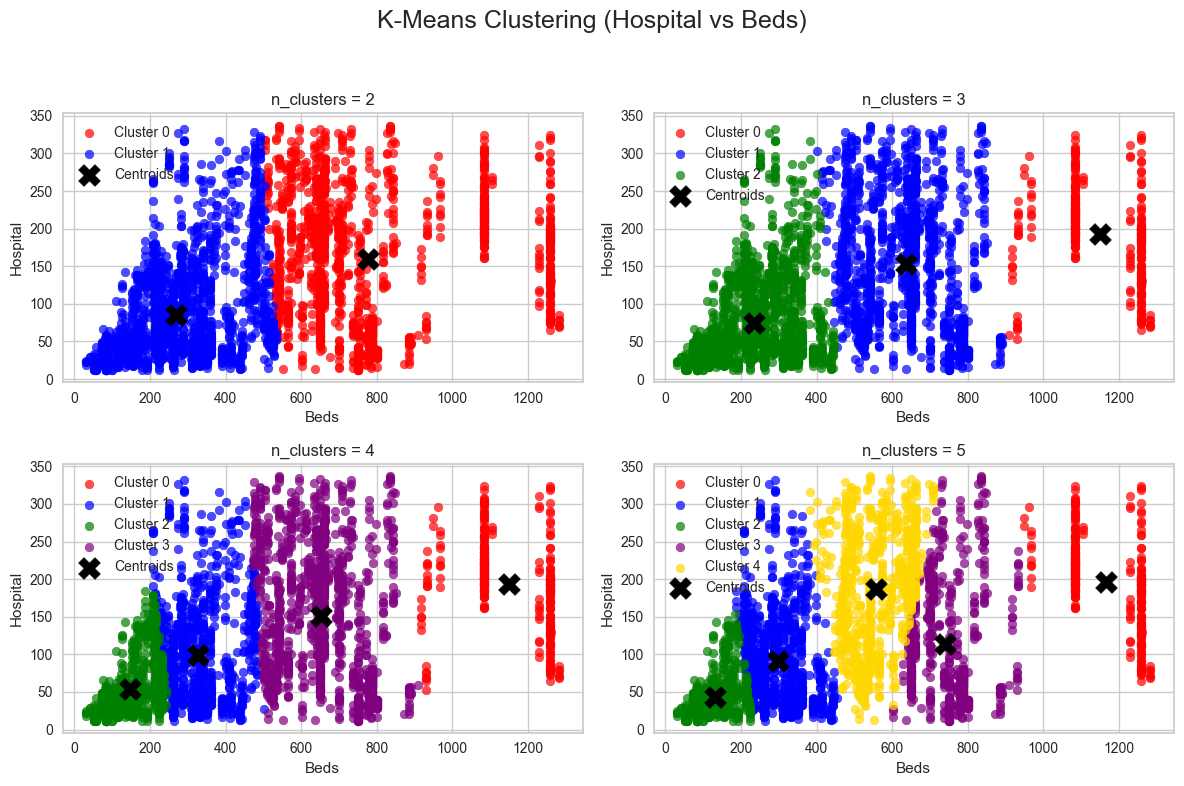

In [61]:
# Mencoba nilai k = 2, 3, 4, 5
color_sets = [
    ["red", "blue"],
    ["red", "blue", "green"],
    ["red", "blue", "green", "purple"],
    ["red", "blue", "green", "purple", "gold"]
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("K-Means Clustering (Hospital vs Beds)", fontsize=18)

for idx, n in enumerate(range(2, 6)):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df1)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    colors = color_sets[n - 2]

    ax = axes[idx // 2, idx % 2]
    for i in range(n):
        cluster = df1[labels == i]
        ax.scatter(cluster[:, 0], cluster[:, 1], 
                   color=colors[i], label=f'Cluster {i}', s=40, alpha=0.7)

    ax.scatter(centroids[:, 0], centroids[:, 1],
               marker='X', s=250, c='black', label='Centroids')

    ax.set_title(f'n_clusters = {n}')
    ax.set_xlabel('Beds')
    ax.set_ylabel('Hospital')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Visualisasi menunjukkan hasil K-Means Clustering pada data rumah sakit berdasarkan fitur beds_covid dan hosp_covid. Tiap titik mewakili satu rumah sakit, dengan warna berbeda untuk tiap klaster, dan simbol silang hitam (X) menandai pusat klaster (centroid).

## *Elbow Method*

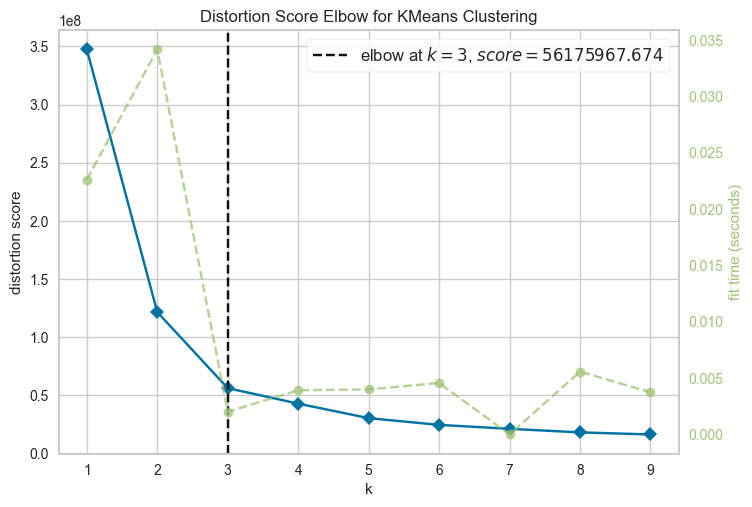

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Memilih K optimal dengan elbow method
model = KMeans(init="k-means++", random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(df1)  
visualizer.show()

Grafik Elbow di atas menunjukkan bahwa nilai distortion score menurun tajam dari k = 1 hingga k = 3, kemudian melandai setelahnya. Titik siku (elbow) terlihat jelas pada k = 3, yang menunjukann jumlah klaster optimal.

# **Evaluasi**

In [51]:
# Evaluasi kmeans dengan silhouette_score, davies_bouldin_score, calinski_harabasz_score
results = []

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df1)

    silhouette = silhouette_score(df1, labels)
    dbi = davies_bouldin_score(df1, labels)
    chi = calinski_harabasz_score(df1, labels)

    results.append((n_clusters, silhouette, dbi, chi))

results_df = pd.DataFrame(results, columns=[
    "n_clusters", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"
])
results_df["Best Silhouette"] = results_df["Silhouette Score"] == results_df["Silhouette Score"].max()
results_df["Best DBI"] = results_df["Davies-Bouldin Index"] == results_df["Davies-Bouldin Index"].min()
results_df["Best CHI"] = results_df["Calinski-Harabasz Index"] == results_df["Calinski-Harabasz Index"].max()

print("\nHasil Evaluasi KMeans Clustering:")
print(results_df.to_string(index=False))

best_silhouette = results_df.loc[results_df["Best Silhouette"]].iloc[0]
best_dbi = results_df.loc[results_df["Best DBI"]].iloc[0]
best_chi = results_df.loc[results_df["Best CHI"]].iloc[0]

print("\nKesimpulan:")
print(f"- Silhouette Score terbaik: n_clusters = {int(best_silhouette['n_clusters'])} dengan nilai {best_silhouette['Silhouette Score']:.4f}")
print(f"- Davies-Bouldin Index terbaik: n_clusters = {int(best_dbi['n_clusters'])} dengan nilai {best_dbi['Davies-Bouldin Index']:.4f}")
print(f"- Calinski-Harabasz Index terbaik: n_clusters = {int(best_chi['n_clusters'])} dengan nilai {best_chi['Calinski-Harabasz Index']:.4f}")



Hasil Evaluasi KMeans Clustering:
 n_clusters  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index  Best Silhouette  Best DBI  Best CHI
          2          0.563736              0.629691              6555.567104            False     False     False
          3          0.599484              0.526152              9140.782212             True      True     False
          4          0.457893              0.681420              8351.738733            False     False     False
          5          0.436087              0.788491              9193.596690            False     False      True

Kesimpulan:
- Silhouette Score terbaik: n_clusters = 3 dengan nilai 0.5995
- Davies-Bouldin Index terbaik: n_clusters = 3 dengan nilai 0.5262
- Calinski-Harabasz Index terbaik: n_clusters = 5 dengan nilai 9193.5967


Berdasarkan hasil evaluasi diatas dan hasil pada elbow method maka akan dipilih n_cluster = 3

In [52]:
# Menggunakan k yang optimal
k = 3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(df1)

labels = kmeans.labels_ 

## **Analisis dan Interpretasi Hasil Cluster**

In [53]:
# Menambahkan hasil cluster ke dataset asli
df2 = df.copy()
df2['Cluster']= y_kmeans
df2

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid,Cluster
43,2020-03-26,W.P. Kuala Lumpur,1570,248,1537,4,12,16,9,10,19,136,21,698,1
46,2020-03-27,Kedah,1218,165,1183,1,4,5,1,6,7,50,6,584,1
49,2020-03-27,Negeri Sembilan,1223,262,1205,2,6,8,14,11,25,103,4,515,1
58,2020-03-27,W.P. Kuala Lumpur,1570,248,1537,6,16,22,10,12,22,152,20,675,1
65,2020-03-28,Pahang,1520,180,1473,10,8,18,9,13,22,50,43,644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,2023-06-30,Selangor,4954,437,4808,26,5,31,28,2,30,19,27,2464,1
18718,2023-07-02,Selangor,4954,437,4808,31,3,34,16,6,22,13,40,2341,1
18734,2023-07-03,Selangor,4954,437,4808,25,6,31,30,4,34,15,35,3174,1
18846,2023-07-10,Selangor,4954,437,4808,8,16,24,8,2,10,23,4,2854,1


In [54]:
# Analisis karakteristik masing-masing cluster
def analyze_beds_and_hospital_covid(df, cluster_col='Cluster'):
    print("Analisis Rata-rata beds_covid dan hosp_covid per Cluster:\n")
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id]
        
        mean_beds_covid = cluster_data['beds_covid'].mean()
        mean_hosp_covid = cluster_data['hosp_covid'].mean()

        print(f"Cluster {cluster_id}:")
        print(f"  Rata-rata Beds Covid     : {mean_beds_covid:.2f}")
        print(f"  Rata-rata Hospital Covid : {mean_hosp_covid:.2f}")
        print("-" * 40)

analyze_beds_and_hospital_covid(df2)


Analisis Rata-rata beds_covid dan hosp_covid per Cluster:

Cluster 0:
  Rata-rata Beds Covid     : 1149.36
  Rata-rata Hospital Covid : 192.47
----------------------------------------
Cluster 1:
  Rata-rata Beds Covid     : 234.82
  Rata-rata Hospital Covid : 74.28
----------------------------------------
Cluster 2:
  Rata-rata Beds Covid     : 637.24
  Rata-rata Hospital Covid : 152.53
----------------------------------------


### Cluster 0:

In [55]:
# Mengambil nilai cluster 0
c0=df2[(df2['Cluster']==0)]
c0.drop(['Cluster'], axis=1,inplace=True)
c0

C:\Users\User\AppData\Local\Temp\ipykernel_19928\4152013404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c0.drop(['Cluster'], axis=1,inplace=True)


,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
4003,2020-12-15,W.P. Kuala Lumpur,3154,908,3017,2,9,11,1,29,30,59,9,1768
4288,2021-01-03,W.P. Kuala Lumpur,3154,949,3011,9,58,67,1,46,47,271,32,1280
4303,2021-01-04,W.P. Kuala Lumpur,3154,949,3011,11,59,70,8,26,34,281,29,1360
4333,2021-01-06,W.P. Kuala Lumpur,3154,963,3091,3,61,64,2,25,27,296,20,1457
5004,2021-02-20,Sabah,2948,1106,2801,16,45,61,13,40,53,269,48,1196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11853,2022-04-29,Sarawak,4001,931,3846,31,9,40,15,15,30,65,46,2211
11869,2022-04-30,Sarawak,4001,931,3846,24,10,34,19,10,29,68,50,2085
11885,2022-05-01,Sarawak,4001,931,3846,13,6,19,24,10,34,69,35,1989
11901,2022-05-02,Sarawak,4001,931,3846,23,2,25,10,9,19,53,35,1941


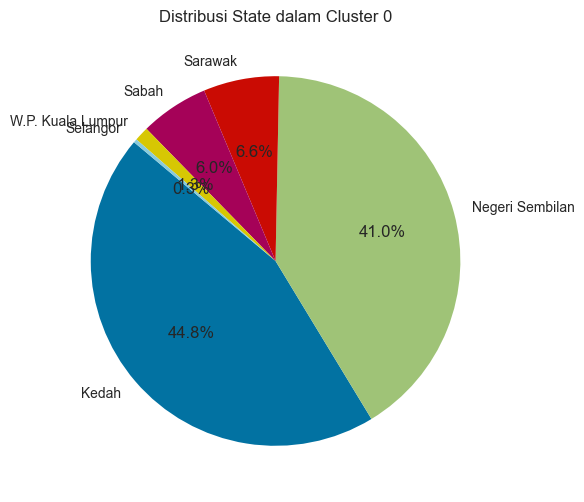

In [56]:
# Menampilkan distribusi daerah pada cluster 0
state_counts = c0['state'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi State dalam Cluster 0')
plt.show()


## Cluster 1:

In [57]:
# Mengambil nilai cluster 1
c1=df2[(df2['Cluster']==1)]
c1.drop(['Cluster'], axis=1,inplace=True)
c1

C:\Users\User\AppData\Local\Temp\ipykernel_19928\2866475081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1.drop(['Cluster'], axis=1,inplace=True)


,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
43,2020-03-26,W.P. Kuala Lumpur,1570,248,1537,4,12,16,9,10,19,136,21,698
46,2020-03-27,Kedah,1218,165,1183,1,4,5,1,6,7,50,6,584
49,2020-03-27,Negeri Sembilan,1223,262,1205,2,6,8,14,11,25,103,4,515
58,2020-03-27,W.P. Kuala Lumpur,1570,248,1537,6,16,22,10,12,22,152,20,675
65,2020-03-28,Pahang,1520,180,1473,10,8,18,9,13,22,50,43,644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,2023-06-30,Selangor,4954,437,4808,26,5,31,28,2,30,19,27,2464
18718,2023-07-02,Selangor,4954,437,4808,31,3,34,16,6,22,13,40,2341
18734,2023-07-03,Selangor,4954,437,4808,25,6,31,30,4,34,15,35,3174
18846,2023-07-10,Selangor,4954,437,4808,8,16,24,8,2,10,23,4,2854


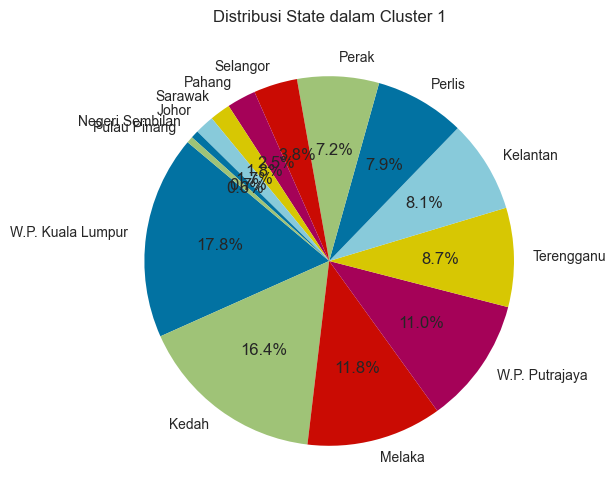

In [58]:
# Menampilkan distribusi daerah pada cluster 1
state_counts = c1['state'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi State dalam Cluster 1')
plt.show()


### Cluster 2:

In [59]:
#  Mengambil nilai cluster 2
c2=df2[(df2['Cluster']==2)]
c2.drop(['Cluster'], axis=1,inplace=True)
c2

C:\Users\User\AppData\Local\Temp\ipykernel_19928\151858645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2.drop(['Cluster'], axis=1,inplace=True)


,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
110,2020-03-31,Pahang,1520,532,1473,16,3,19,13,6,19,62,41,636
118,2020-03-31,W.P. Kuala Lumpur,1570,438,1537,4,14,18,2,16,18,230,35,927
133,2020-04-01,W.P. Kuala Lumpur,3443,552,3410,13,31,44,5,9,14,238,32,1239
140,2020-04-02,Pahang,1669,504,1622,5,13,18,14,8,22,70,41,602
148,2020-04-02,W.P. Kuala Lumpur,3458,544,3425,5,13,18,3,13,16,235,30,888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,2023-01-12,Sarawak,3671,511,3514,5,4,9,4,15,19,22,9,2533
15997,2023-01-13,Sarawak,3671,511,3514,3,4,7,6,10,16,14,5,2551
17614,2023-04-24,Selangor,4995,446,4849,19,23,42,31,11,42,76,49,2447
17646,2023-04-26,Selangor,4995,446,4849,30,48,78,29,19,48,103,54,3068


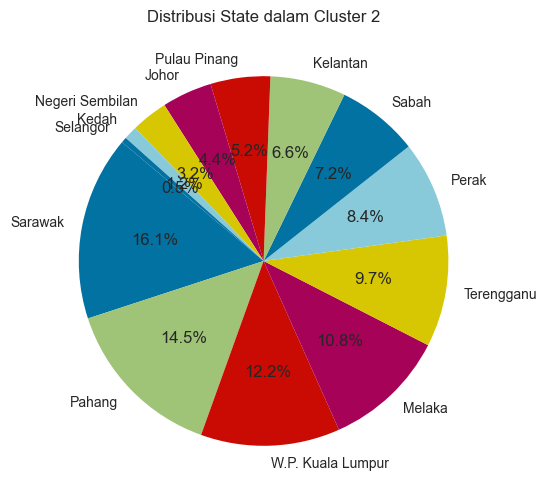

In [60]:
# Menampilkan distribusi daerah pada cluster 2
state_counts = c2['state'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi State dalam Cluster 2')
plt.show()


### **Analisis Karakteristik Setiap Cluster**  

Hasil pengelompokan wilayah berdasarkan jumlah tempat tidur khusus COVID-19 (beds_covid) dan jumlah pasien COVID-19 yang masih dirawat di rumah sakit (hosp_covid) mengidentifikasi tiga cluster utama dengan karakteristik yang berbeda.  

#### **Cluster 0: Kapasitas Tinggi dengan Keterisian Pasien Tinggi**  
- Wilayah Dominan: Kedah  
- Rata-rata Tempat Tidur COVID-19: 1149,36  
- Rata-rata Pasien Dirawat: 192,47  
- Karakteristik:  
  Cluster ini mencakup daerah dengan kapasitas rumah sakit yang besar dan tingkat keterisian pasien yang tinggi. Wilayah dalam cluster ini umumnya merupakan pusat layanan kesehatan utama atau daerah dengan jumlah kasus COVID-19 yang signifikan. Oleh karena itu, diperlukan strategi manajemen fasilitas yang efektif untuk mencegah kelebihan kapasitas (overcapacity) dan memastikan layanan kesehatan tetap optimal.  

#### **Cluster 1: Kapasitas Rendah dengan Keterisian Pasien Rendah**  
- Wilayah Dominan: WP Kuala Lumpur  
- Rata-rata Tempat Tidur COVID-19: 234,82  
- Rata-rata Pasien Dirawat: 74,28  
- Karakteristik:  
  Cluster ini terdiri dari wilayah dengan jumlah tempat tidur COVID-19 yang terbatas dan tingkat keterisian pasien yang relatif rendah. Hal ini dapat mengindikasikan jumlah kasus yang lebih sedikit atau kapasitas rumah sakit yang lebih kecil. Meskipun beban rumah sakit tergolong ringan, perlu adanya sistem rujukan yang efisien agar wilayah ini dapat mengantisipasi lonjakan kasus jika terjadi peningkatan mendadak.  

#### **Cluster 2: Kapasitas Sedang dengan Keterisian Pasien Sedang**  
- Wilayah Dominan: Sarawak  
- Rata-rata Tempat Tidur COVID-19: 637,24  
- Rata-rata Pasien Dirawat: 152,53  
- Karakteristik:  
  Wilayah dalam cluster ini memiliki kapasitas rumah sakit yang cukup besar, namun tidak sebesar cluster 0. Tingkat keterisian pasien juga berada pada level menengah, mencerminkan keseimbangan antara kapasitas rumah sakit dan jumlah pasien yang dirawat. Rumah sakit dalam cluster ini masih dapat mengelola pasien dengan baik tanpa mengalami tekanan yang tinggi, meskipun tetap diperlukan pemantauan untuk menjaga stabilitas layanan.  

### **Kesimpulan**  
Berdasarkan percobaan yang dilakukan, dapat disimpulkan bahwa pemilihan nilai k pada algoritma K-Means memberikan dampak yang signifikan terhadap kualitas hasil clustering. Dalam percobaan ini, jumlah klaster divariasikan antara 2 hingga 5 untuk mengevaluasi performa model. Hasil dari Elbow Method menunjukkan bahwa titik optimal berada pada k = 3. Hasil evaluasi lanjutan menggunakan tiga metrik yaitu: Silhouette Score tertinggi dicapai pada n_clusters = 3 dengan nilai 0.5995, sedangkan Davies-Bouldin Index terendah (semakin kecil nilai indeks ini semakin baik) juga tercatat pada n_clusters = 3, yakni 0.5262. Calinski-Harabasz Index tertinggi tercatat pada n_clusters = 5, dengan nilai 9193.5967, yang menunjukkan bahwa pada jumlah klaster tersebut, pemisahan antar klaster relatif baik. Meskipun Calinski-Harabasz Index mendukung k = 5, hasil yang konsisten pada dua metrik lainnya memperkuat bahwa n_clusters = 3 adalah pilihan yang k yang terbaik. 

Berdasarkan hasil analisis, dapat disimpulkan bahwa:  
- Cluster 0 memiliki kapasitas besar namun dengan tingkat keterisian yang tinggi, sehingga memerlukan strategi manajemen sumber daya yang baik untuk mencegah kelebihan beban.  
- Cluster 1 memiliki kapasitas yang lebih terbatas, sehingga perlu memperkuat koordinasi rujukan agar mampu menangani potensi lonjakan kasus.  
- Cluster 2 berada pada kondisi yang lebih seimbang, tetapi tetap membutuhkan pemantauan untuk menjaga stabilitas antara kapasitas dan kebutuhan layanan kesehatan.  


